## Hypothesis Testing 


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# Load Data
df_w1 = pd.read_csv('../Cooked/df_w1_prepared.csv')
df_w2 = pd.read_csv('../Cooked/df_w2_prepared.csv') 
df_w3 = pd.read_csv('../Cooked/df_w3_prepared.csv')

### Political-Self-Assessment

- scale only ranged form 1 to 11 
- "0" values are missings!

In [38]:
def political_identity(df):
    dict_political_identity = {}

    for index, row in df.iterrows():
        participant_id = row['participant.label']
        self_identity = row.get('network_app.1.player.linksrechts_self')

        # If self_identity is 0 or NaN, set to NaN
        if pd.isna(self_identity) or self_identity == 0:
            self_identity = float('nan')
        
        dict_political_identity[participant_id] = {
            'ego': self_identity,
        }
    return dict_political_identity


In [39]:
dict_polident_w1 = political_identity(df_w1)
dict_polident_w2 = political_identity(df_w2)
dict_polident_w3 = political_identity(df_w3)

In [40]:
dict_polident_w2

{'ddh': {'ego': 3},
 'evh': {'ego': 2},
 'bs3': {'ego': 3},
 'k4w': {'ego': 7},
 '39b': {'ego': 4},
 'm49': {'ego': 2},
 'cyw': {'ego': 5},
 'bqr': {'ego': 2},
 'e4u': {'ego': 6},
 'vgv': {'ego': 4},
 'xtk': {'ego': 4},
 'uhg': {'ego': 3},
 '4gw': {'ego': 5},
 'qqt': {'ego': 3},
 'v3e': {'ego': 6},
 'gdg': {'ego': 4},
 'pkt': {'ego': 7},
 'afp': {'ego': 4},
 'vnb': {'ego': 7},
 'ara': {'ego': 7},
 '4ww': {'ego': 2},
 '4dk': {'ego': 4},
 'mhp': {'ego': 5},
 'dmd': {'ego': 6},
 'gth': {'ego': 4},
 'byq': {'ego': 1},
 'knb': {'ego': 3},
 'ngv': {'ego': 2},
 'ceh': {'ego': 3},
 'hmt': {'ego': 3},
 'yte': {'ego': 4},
 'ngr': {'ego': 5},
 '9fx': {'ego': 3},
 'ryn': {'ego': 4},
 'wrc': {'ego': 4},
 '9gt': {'ego': 8},
 'yer': {'ego': 7},
 'tpu': {'ego': 3},
 'p49': {'ego': 3},
 'tdq': {'ego': 3},
 'yg9': {'ego': 6},
 'vcb': {'ego': 6},
 'bxg': {'ego': 6},
 'ech': {'ego': 8},
 '3md': {'ego': 3},
 'bgq': {'ego': 6},
 'asv': {'ego': 2},
 'hry': {'ego': 5},
 'sva': {'ego': 3},
 'xyb': {'ego': 3},


In [63]:
# delta_ego_alter für Susumu, am besten mit abs() delta und nicht plus/minus 

# Build a DataFrame
df_ego = pd.DataFrame({
    'w1': {pid: data['ego'] for pid, data in dict_polident_w1.items()},
    'w2': {pid: data['ego'] for pid, data in dict_polident_w2.items()},
    'w3': {pid: data['ego'] for pid, data in dict_polident_w3.items()},
})

df_ego.index.name = 'participant_id'
df_ego = df_ego.reset_index()
df_ego_complete = df_ego.dropna()

df_ego_complete.sort_values(by=['w1'], ascending=True, inplace=True) 
df_ego_complete

/var/folders/jl/tj67gv9n4_sd4yxc6ynl78500000gn/T/ipykernel_65063/4292741773.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ego_complete.sort_values(by=['w1'], ascending=True, inplace=True)


,participant_id,w1,w2,w3
4,qew,1.0,1.0,1.0
17,ent,1.0,2.0,2.0
113,gb4,1.0,2.0,2.0
137,byq,1.0,1.0,1.0
30,dss,1.0,6.0,7.0
...,...,...,...,...
172,ytr,8.0,8.0,8.0
160,ech,8.0,8.0,8.0
68,3xt,8.0,8.0,8.0
146,qxn,9.0,8.0,8.0


In [43]:
df_long = df_ego_complete.melt(id_vars='participant_id', 
                      value_vars=['w1', 'w2', 'w3'],
                      var_name='wave', 
                      value_name='ego_score')

df_long

,participant_id,wave,ego_score
0,qew,w1,1.0
1,ent,w1,1.0
2,gb4,w1,1.0
3,byq,w1,1.0
4,dss,w1,1.0
...,...,...,...
310,ytr,w3,8.0
311,ech,w3,8.0
312,3xt,w3,8.0
313,qxn,w3,8.0


/var/folders/jl/tj67gv9n4_sd4yxc6ynl78500000gn/T/ipykernel_65063/1819087568.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Participant')


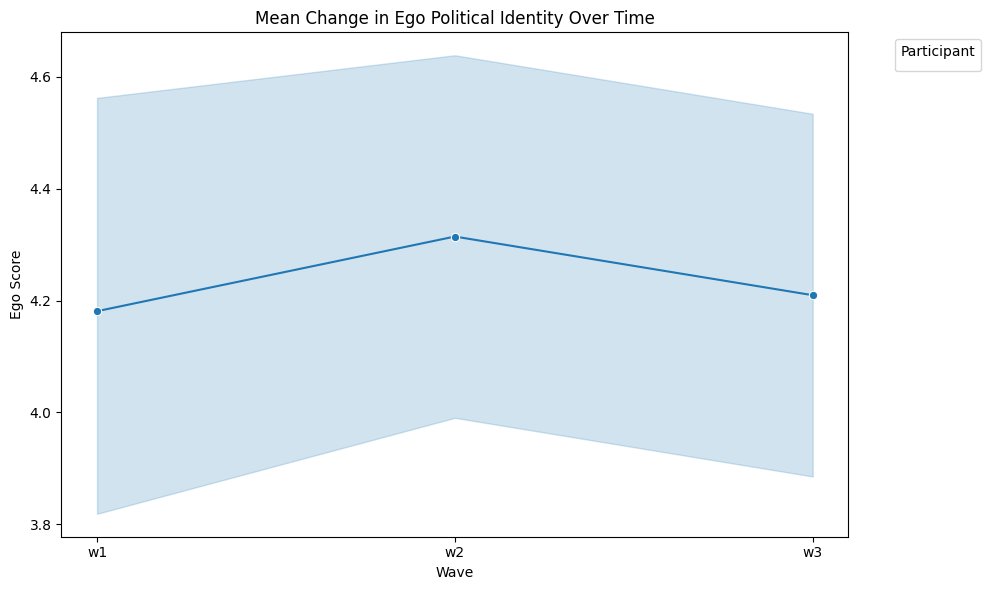

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='wave', y='ego_score', marker='o')
plt.title('Mean Change in Ego Political Identity Over Time')
plt.ylabel('Ego Score')
plt.xlabel('Wave')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Participant')
plt.tight_layout()
plt.show()

In [45]:
print(df_ego_complete["w1"].mean())
print(df_ego_complete["w2"].mean())
print(df_ego_complete["w3"].mean())

4.180952380952381
4.314285714285714
4.20952380952381


/var/folders/jl/tj67gv9n4_sd4yxc6ynl78500000gn/T/ipykernel_65063/3887324877.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('coolwarm').reversed()
/var/folders/jl/tj67gv9n4_sd4yxc6ynl78500000gn/T/ipykernel_65063/3887324877.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Participant')


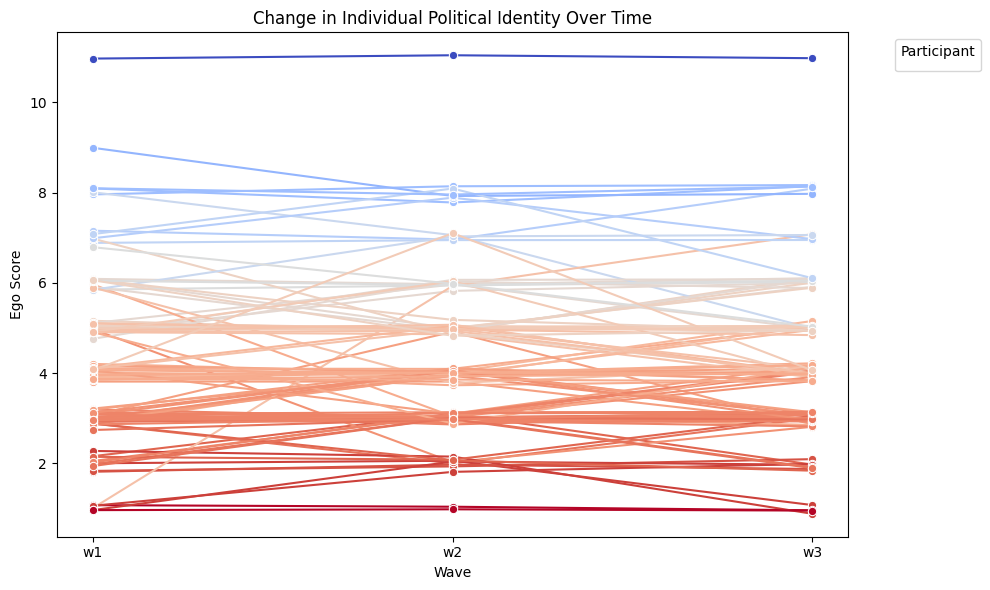

In [46]:
#### Step 1: Get average ego_score per participant!!!
participant_means = df_long.groupby('participant_id')['ego_score'].mean()

# Step 2: Normalize these scores
norm = Normalize(vmin=participant_means.min(), vmax=participant_means.max())

# Step 3: Get the colormap (blue-white-red)
cmap = get_cmap('coolwarm').reversed()

# Step 4: Map each participant to a color
participant_colors = {pid: cmap(norm(score)) for pid, score in participant_means.items()}

jitter_strength = 0.1
df_long['ego_jittered'] = df_long['ego_score'] + np.random.normal(0, jitter_strength, size=len(df_long))

# Step 5: Plot each line individually with its mapped color
plt.figure(figsize=(10, 6))
for pid, group in df_long.groupby('participant_id'):
    sns.lineplot(data=group, x='wave', y='ego_jittered', marker='o',
                 color=participant_colors[pid])

plt.title('Change in Individual Political Identity Over Time')
plt.ylabel('Ego Score')
plt.xlabel('Wave')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Participant')
plt.tight_layout()
plt.show()


***

### Political Assessment by Others

In [62]:
df_w1

,participant.label,conjoint_app.1.player.device_type,conjoint_app.1.player.operating_system,conjoint_app.1.player.browser,conjoint_app.1.player.lang,conjoint_app.1.player.use_of_device,demographic_app.1.player.rent,demographic_app.1.player.income,demographic_app.1.player.edu_father,demographic_app.1.player.edu_mother,...,political_app.1.player.politics_question_six,political_app.1.player.politics_question_seven,political_app.1.player.lr_CDU,political_app.1.player.lr_CSU,political_app.1.player.lr_SPD,political_app.1.player.lr_Gruene,political_app.1.player.lr_FDP,political_app.1.player.lr_Linke,political_app.1.player.lr_AfD,political_app.1.player.lr_BSW
0,wer,3.0,2.0,3.0,1.0,2.0,-999.0,-999.0,3.0,2.0,...,-999,-999,3,6,9,8,10,-999,-999,-999
1,ttz,3.0,2.0,3.0,0.0,2.0,-999.0,-999.0,2.0,1.0,...,-999,-999,-999,-999,-999,-999,-999,1,-999,-999
2,kru,3.0,2.0,3.0,0.0,1.0,-999.0,-999.0,1.0,1.0,...,4,4,6,6,5,4,3,3,11,8
3,4yx,2.0,5.0,3.0,0.0,3.0,-999.0,-999.0,1.0,1.0,...,5,5,7,9,6,5,8,3,10,8
4,qew,3.0,2.0,3.0,0.0,1.0,-999.0,-999.0,4.0,4.0,...,4,4,10,10,6,4,8,2,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3ya,3.0,2.0,3.0,0.0,2.0,-999.0,-999.0,4.0,4.0,...,4,4,6,7,4,3,9,1,11,2
176,cyw,2.0,4.0,3.0,0.0,3.0,-999.0,-999.0,1.0,4.0,...,3,3,9,10,5,4,7,2,11,8
177,dxp,3.0,2.0,3.0,0.0,1.0,-999.0,-999.0,1.0,1.0,...,4,4,9,10,5,4,6,1,11,9
178,vcb,3.0,2.0,3.0,0.0,NaN,-999.0,-999.0,3.0,3.0,...,5,5,7,-999,5,4,7,2,9,2


In [61]:
def political_identity_targeted(df):
    dict_political_identity = {}

    # First pass: build the base dictionary
    for index, row in df.iterrows():
        participant_id = row['participant.label']
        self_identity = row.get('network_app.1.player.linksrechts_self')

        if pd.isna(self_identity) or self_identity == 0:
            self_identity = float('nan')
        
        dict_political_identity[participant_id] = {
            'self': self_identity,
            'perception': {}
        }

        for i in range(1, 30):
            other_identity = row.get(f'network_app.1.player.linksrechts_{i}')
            other_person = row.get(f'network_app.1.player.person_{i}')
            if pd.notna(other_identity) and other_identity != 0:
                dict_political_identity[participant_id]['perception'][other_person] = {
                    "given": other_identity,
                    "self": float('nan')
                }

    # Second pass: fill in 'self' for each alter using the alter's ego
    for participant_id, data in dict_political_identity.items():
        for alter_id in data['alter']:
            if alter_id in dict_political_identity:
                alter_ego = dict_political_identity[alter_id]['ego']
                data['alter'][alter_id]['self'] = alter_ego

    return dict_political_identity


In [59]:
dict_targeted_identity_w1 = political_identity_targeted(df_w1)
dict_targeted_identity_w2 = political_identity_targeted(df_w2)
dict_targeted_identity_w3 = political_identity_targeted(df_w3)

In [60]:
dict_targeted_identity_w2

{'ddh': {'self': 3, 'alter': {}},
 'evh': {'self': 2, 'alter': {}},
 'bs3': {'self': 3, 'alter': {}},
 'k4w': {'self': 7, 'alter': {}},
 '39b': {'self': 4, 'alter': {}},
 'm49': {'self': 2, 'alter': {}},
 'cyw': {'self': 5, 'alter': {}},
 'bqr': {'self': 2, 'alter': {}},
 'e4u': {'self': 6, 'alter': {}},
 'vgv': {'self': 4, 'alter': {}},
 'xtk': {'self': 4, 'alter': {}},
 'uhg': {'self': 3, 'alter': {}},
 '4gw': {'self': 5, 'alter': {}},
 'qqt': {'self': 3, 'alter': {}},
 'v3e': {'self': 6, 'alter': {}},
 'gdg': {'self': 4, 'alter': {}},
 'pkt': {'self': 7, 'alter': {}},
 'afp': {'self': 4, 'alter': {}},
 'vnb': {'self': 7, 'alter': {}},
 'ara': {'self': 7, 'alter': {}},
 '4ww': {'self': 2, 'alter': {}},
 '4dk': {'self': 4, 'alter': {}},
 'mhp': {'self': 5, 'alter': {}},
 'dmd': {'self': 6, 'alter': {}},
 'gth': {'self': 4, 'alter': {}},
 'byq': {'self': 1, 'alter': {}},
 'knb': {'self': 3, 'alter': {}},
 'ngv': {'self': 2, 'alter': {}},
 'ceh': {'self': 3, 'alter': {}},
 'hmt': {'self

### Plot 1
- y-axe: Differenz (Wahrnehmung - Selbsteinstufung) 
- x-Axe: Selbsteinstufung


In [50]:
# Plot 1 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def flatten_identity_dict(dict_political_identity):
    rows = []

    for ego_id, values in dict_political_identity.items():
        ego_value = values['ego']
        for alter_id, alter_data in values['alter'].items():
            given = alter_data['given']
            if pd.notna(ego_value) and pd.notna(given):
                diff_percetion_self = (ego_value - given) 
                diff_other_self = (ego_value - alter_data['self'])
                rows.append({
                    'alter_id': alter_id,
                    'ego': ego_value,
                    'alter': alter_data['self'],
                    'alter_given': given,
                    'given_minus_self': diff_percetion_self,
                    'other_minus_self': diff_other_self,
                    'abs_given_minus_self': abs(diff_percetion_self),
                    'abs_other_minus_self': abs(diff_other_self)
                })

    return pd.DataFrame(rows)

long_df_w1 = flatten_identity_dict(dict_targeted_identity_w1)
long_df_w2 = flatten_identity_dict(dict_targeted_identity_w2)
long_df_w3 = flatten_identity_dict(dict_targeted_identity_w3)


In [51]:
long_df_w1

""


In [52]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w1['ego_jittered'] = long_df_w1['ego'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))
long_df_w1['alter_given_jittered'] = long_df_w1['alter_given'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w1,
    x="ego_jittered",
    y="alter_given_jittered",
    alpha=0.6
)
#plt.ylim([-11, 11])
#plt.xlim([0, 12])
plt.axhline(0, color='gray', linestyle='--')
#plt.xlabel("Self-Perception of Political Identity")
#plt.ylabel("External - SelfPerception")
plt.title("W1")
plt.savefig("/Users/ramius/Desktop/Results/P1_W1.png", dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'ego'

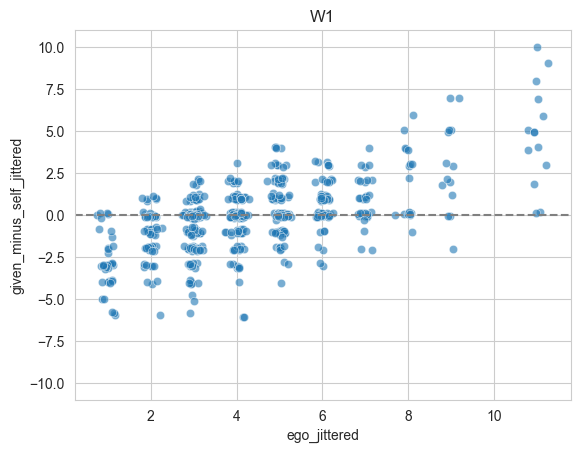

In [451]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w1['ego_jittered'] = long_df_w1['ego'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))
long_df_w1['given_minus_self_jittered'] = long_df_w1['given_minus_self'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w1,
    x="ego_jittered",
    y="given_minus_self_jittered",
    alpha=0.6
)
plt.ylim([-11, 11])
#plt.xlim([0, 12])
plt.axhline(0, color='gray', linestyle='--')
#plt.xlabel("Self-Perception of Political Identity")
#plt.ylabel("External - SelfPerception")
plt.title("W1")
plt.savefig("/Users/ramius/Desktop/Results/P1_W1.png", dpi=300, bbox_inches='tight')
plt.show()

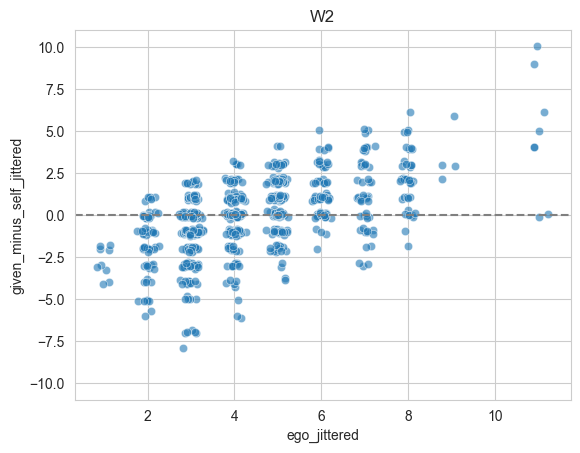

In [452]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w2['ego_jittered'] = long_df_w2['ego'] + np.random.normal(0, jitter_strength, size=len(long_df_w2))
long_df_w2['given_minus_self_jittered'] = long_df_w2['given_minus_self'] + np.random.normal(0, jitter_strength, size=len(long_df_w2))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w2,
    x="ego_jittered",
    y="given_minus_self_jittered",
    alpha=0.6
)
plt.axhline(0, color='gray', linestyle='--')
plt.ylim([-11, 11])
#plt.xlabel("Self-Perception of Political Identity")
#plt.ylabel("External - SelfPerception")
plt.title("W2")
plt.savefig("/Users/ramius/Desktop/Results/P1_W2.png", dpi=300, bbox_inches='tight')
plt.show()

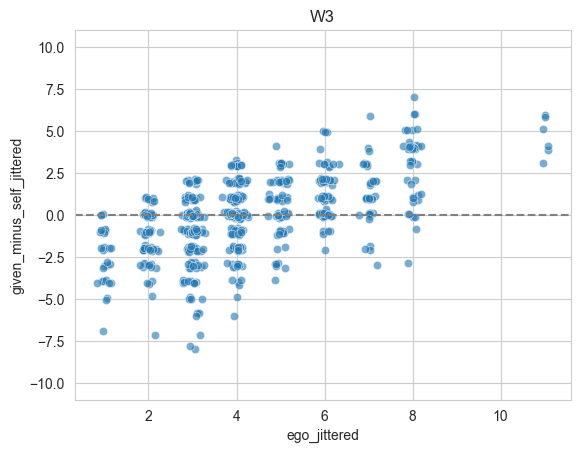

In [453]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w3['ego_jittered'] = long_df_w3['ego'] + np.random.normal(0, jitter_strength, size=len(long_df_w3))
long_df_w3['given_minus_self_jittered'] = long_df_w3['given_minus_self'] + np.random.normal(0, jitter_strength, size=len(long_df_w3))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w3,
    x="ego_jittered",
    y="given_minus_self_jittered",
    alpha=0.6
)
plt.axhline(0, color='gray', linestyle='--')
plt.ylim([-11, 11])
#plt.xlabel("Self-Perception of Political Identity")
#plt.ylabel("External - SelfPerception")
plt.title("W3")
plt.savefig("/Users/ramius/Desktop/Results/P1_W3.png", dpi=300, bbox_inches='tight')
plt.show()


## Second Plot
- y-axe: Differenz (Wahrnehmung - Selbsteinstufung)
- x-axe: Differenz zwischen Selbsteinstufung der Befragten und Selbsteinstufung des Targets

In [ ]:
long_df_w1

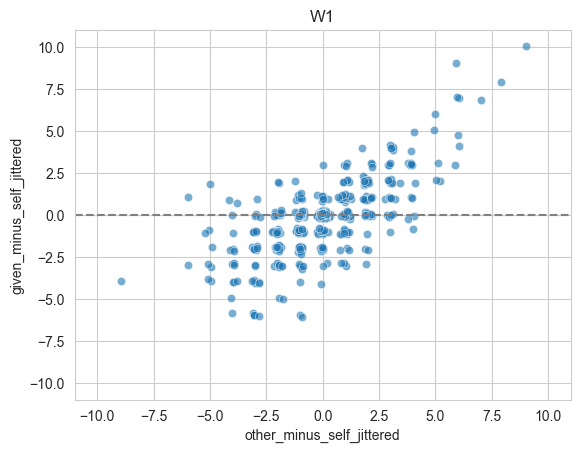

In [458]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w1['given_minus_self_jittered'] = long_df_w1['given_minus_self'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))
long_df_w1['other_minus_self_jittered'] = long_df_w1['other_minus_self'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w1,
    x="other_minus_self_jittered",
    y="given_minus_self_jittered",
    alpha=0.6
)
plt.axhline(0, color='gray', linestyle='--')
#plt.xlabel("Self-Perception - Other-Self-Perception")
#plt.ylabel("External - SelfPerception")
plt.ylim([-11, 11])
plt.xlim([-11, 11])
plt.title("W1")
plt.savefig("/Users/ramius/Desktop/Results/P2_W1.png", dpi=300, bbox_inches='tight')
plt.show()

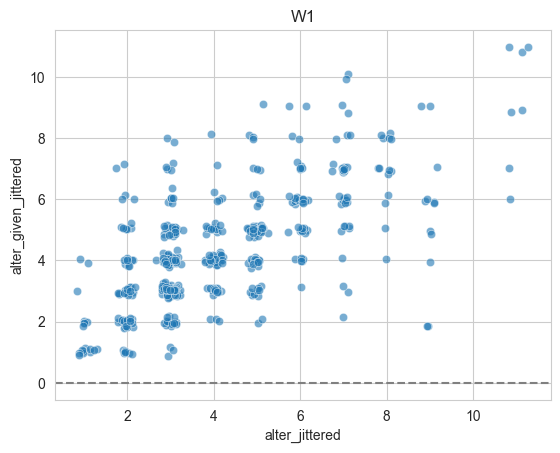

In [461]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w1['alter_given_jittered'] = long_df_w1['alter_given'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))
long_df_w1['alter_jittered'] = long_df_w1['alter'] + np.random.normal(0, jitter_strength, size=len(long_df_w1))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w1,
    x="alter_jittered",
    y="alter_given_jittered",
    alpha=0.6
)
plt.axhline(0, color='gray', linestyle='--')
#plt.xlabel("Self-Perception - Other-Self-Perception")
#plt.ylabel("External - SelfPerception")
#plt.ylim([-11, 11])
#plt.xlim([-11, 11])
plt.title("W1")
plt.savefig("/Users/ramius/Desktop/Results/P2_W1.png", dpi=300, bbox_inches='tight')
plt.show()

In [455]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w2['ego_jittered'] = long_df_w2['ego_minus_alterego'] + np.random.normal(0, jitter_strength, size=len(long_df_w2))
long_df_w2['ego_minus_given_jittered'] = long_df_w2['ego_minus_given'] + np.random.normal(0, jitter_strength, size=len(long_df_w2))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w2,
    x="ego_jittered",
    y="ego_minus_given_jittered",
    alpha=0.6
)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Self-Perception - Other-Self-Perception")
plt.ylabel("External - SelfPerception")
plt.title("W2")
plt.savefig("/Users/ramius/Desktop/Results/P2_W2.png", dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'ego_minus_alterego'

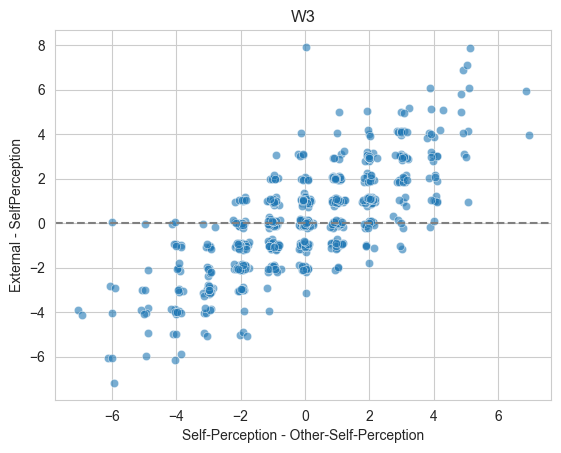

In [276]:
# Add jitter (small random noise) to the data
jitter_strength = 0.1
long_df_w3['ego_jittered'] = long_df_w3['ego_minus_alterego'] + np.random.normal(0, jitter_strength, size=len(long_df_w3))
long_df_w3['ego_minus_given_jittered'] = long_df_w3['ego_minus_given'] + np.random.normal(0, jitter_strength, size=len(long_df_w3))

# Plot with jittered values
sns.scatterplot(
    data=long_df_w3,
    x="ego_jittered",
    y="ego_minus_given_jittered",
    alpha=0.6
)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Self-Perception - Other-Self-Perception")
plt.ylabel("External - SelfPerception")
plt.title("W3")
plt.savefig("/Users/ramius/Desktop/Results/P2_W3.png", dpi=300, bbox_inches='tight')
plt.show()

***